# Classification on CIFAR 10 Dataset

Instructions - 
1. In order to kick start, code for setting up the dataframes has already been given (Step 1 to 5)
2. Go through the entire code written below and put the relavent comment for each line of code. Understanding below mentioned code is very important.
3. After commenting the code in step 1 to 5, complete step 6 and 7

### Step - 1 (Setup Code)

In [ ]:
# Run some setup code for this notebook.

import random
import numpy as np
import matplotlib.pyplot as plt
import os


from __future__ import print_function

from builtins import range
from six.moves import cPickle as pickle
from imageio import imread
import platform

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

### Step - 2 (Download the dataset)

In [ ]:
# # Use this code to download the dataset for the first time
# # You will be required to install wget using pip
# # For Linux users checkout the alternative for 'del'

!wget http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz -O cifar-10-python.tar.gz
!tar -xzvf cifar-10-python.tar.gz
# !del cifar-10-python.tar.gz

--2021-11-24 11:23:31--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  69.1MB/s    in 2.4s    

2021-11-24 11:23:34 (69.1 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


### Step - 3 (Load the Dataset)

In [ ]:
# This cell loads the training and testing dataset. Please note the variables at
# the end of the cell as you would require them to access the train/test data 
# and labels throughout the assignment
def load_pickle(f):
    version = platform.python_version_tuple()
    if version[0] == '2':
        return  pickle.load(f)
    elif version[0] == '3':
        return  pickle.load(f, encoding='latin1')
    raise ValueError("invalid python version: {}".format(version))


def load_CIFAR_batch(filename):
    """ load single batch of cifar """
    with open(filename, 'rb') as f:
        datadict = load_pickle(f)
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
        Y = np.array(Y)
        return X, Y


def load_CIFAR10(ROOT):
    """ load all of cifar """
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte


cifar10_dir = 'cifar-10-batches-py'

# Cleaning up variables to prevent loading data multiple times
try:
    del X_train, y_train
    del X_test, y_test
    print('Clear previously loaded data.')
except:
    pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Clear previously loaded data.
Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


### Step - 4 (Visualization)

Next we visualize the CIFAR-10 dataset. Although these functions are being written for you, we highly recommend you go through the code and make yourself familiar as these are things you will be required to do very often when working on AI/ML projects

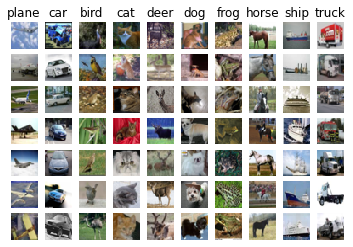

In [ ]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

### Step - 5 (Flattening the images)

In the next cell we flatten each image into a single dimensional vector so that it is easy to process. You should be able to reason about the dimensions comfortable.

In [ ]:
# Subsample the data for more efficient code execution in this exercise
num_training = 5000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(5000, 3072) (500, 3072)


In [ ]:
X_train[0]

array([ 59.,  62.,  63., ..., 123.,  92.,  72.])

## Classification Algorithms

### **Logistic Regression:-**

**Intuition:-**

Logistic regression model computes weighted sum of input features but instead of outputting te result directly like linear regression model does, it ouputs the logistic of this result.

$\sigma{}(x) = \frac{1}{1 + e^{-x}}$
 , it is the logistic function. 

### **SVM:-**


Intuition:-

It is a supervised and linear Machine Learning algorithm and it is most commonly used for solving classification problems. It is also called support vector classification.

The main idea behind SVM is - 
- Draw a line that best separate the classes of data points.

![svm](https://analyticsindiamag.com/wp-content/uploads/2019/06/applesvsoranges-385x366.png)

SVM generates a margin that separates the classes. The more that margin, the better the classes are separated. And the Support vectors are the data points through which the green line passes through. 

The SVM then generates a hyperplane that divide the margin distance equally between the classes.

### **Decision Tree:-**

Intuition:-

The Decision Tree is based on the decision making technique. Like 'yes' or 'no', 'true' or 'false' etc. If 'yes' then choose this, and if 'no' then choose that. 

![dt](https://www.newtechdojo.com/wp-content/uploads/2020/06/Pic-4-768x469.png)

There are some important concepts in decision tree algorithm-
- Entropy: The entropy is an indication of the messiness of the data. More the entropy of the dataset, the higher the degree of mixing. While lower entropy corresponds to a well separated data.
- Information gain: After separation of the data, there is a desirable direction for the exploration of the data and this phenomenon is called information gain.
- Gini Index: It is the measure of how impure the data is. We try to decrease the impurity of the dataset after moving through each node in a decision tree. Lowering the gini index means that the data is separated and that it is now pure.

### **Naive Bayes:-**

**Intuition:-**

Naive Bayes classifier is a simple probabilistic classifier which is based on the Bayes theorem.

Bayes’ theorem states the following:

$P(A|B)=\frac{P(B|A)∗P(A)}{P(B)}$

- P(A|B)  refers to the probability that A will be true given that B is true.
- P(B|A)  refers to the probability that B will be true given that A is true
- P(A)  and  P(B)  refer to the probabilities that A and B will be true, respectively.

All Naive Bayes classifiers assume that the value of a one feature is independent of the value of any other feature, on given a condition(i.e. class label).

### Model parameters and Hyperparameters

**Model parameter:-**

A model parameter is a configuration variable that is internal to the model and whose value can be estimated from the given data.

- They are required by the model when making predictions.
- Their values define the skill of the model on your problem.
- They are estimated or learned from data.
- They are often not set manually by the practitioner.
- They are often saved as part of the learned model.

Like arguments in a normal programming function, the model requires parameters to make prediction on new data.

Examples of model parameters:-
- The weights in an artificial neural network.
- The support vectors in a support vector machine.
- The coefficients in a linear regression or logistic regression.

**Hyperparameter:-**

A model hyperparameter is a configuration that is external to the model and whose value cannot be estimated from data.

- They are often used in processes to help estimate model parameters.
- They are often specified by the practitioner.
- They can often be set using heuristics.
- They are often tuned for a given predictive modeling problem.

The best value of a model hyperparameter is unknown. It is trail and error, or copy values from some other similar problems to obtain best results.

Hyperparameters are manually specified for a specific model.

Examples of hyperparameters:-
- The learning rate for training a neural network.
- The C, Kernel, Sigma hyperparameters for support vector machines.
- The k in k-nearest neighbors.
- criterion, max_depth, max_feature, min_samples_split, etc are hyperparameters for a Decision Tree.
- c, Penaly and SOlver for Logistic Regression.
 
So we can say that a hyperparameer is a point of flexibility that allows a model to better adapt to the data it is given. The more hyperparameters we have to control, the better we can fit that model but the more likely we are to overfit your model if we are not careful as well.




### Over Fitting and Under Fitting

**Over Fitting:-**

Overfitting refers to a model that models the training data too well.

Overfitting happens when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data. This means that the noise or random fluctuations in the training data is picked up and learned as concepts by the model. The problem is that these concepts do not apply to new data and negatively impact the models ability to generalize.

Overfitting is more likely with nonparametric and nonlinear models that have more flexibility when learning a target function. As such, many nonparametric machine learning algorithms also include parameters or techniques to limit and constrain how much detail the model learns.

For example, decision trees are a nonparametric machine learning algorithm that is very flexible and is subject to overfitting training data. This problem can be addressed by pruning a tree after it has learned in order to remove some of the detail it has picked up.

**Under Fitting:-**

Underfitting refers to a model that can neither model the training data nor generalize to new data.

An underfit machine learning model is not a suitable model and will be obvious as it will have poor performance on the training data.

Underfitting is often not discussed as it is easy to detect given a good performance metric. The remedy is to move on and try alternate machine learning algorithms. Nevertheless, it does provide a good contrast to the problem of overfitting.

In [ ]:
import numpy as np 
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics 
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler 

import warnings
warnings.filterwarnings("ignore")

In [ ]:
rf_classifier = RandomForestClassifier(n_jobs=-1) 

In [ ]:
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [1, 3, 5],
    "criterion": ["gini", "entropy"],
}

In [ ]:
model = GridSearchCV(
    estimator=rf_classifier, param_grid=param_grid, cv=5, verbose=2, n_jobs=1
)

In [ ]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

plt.figure(figsize=(14, 5))
for i in range(len(param_grid['n_estimators'])):
    ax = plt.subplot(1, len(param_grid['n_estimators']), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(
        pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
    )

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(
        "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores.mean(), scores.std()
        )
    )
plt.show()

### Train and Test Time/Space complexity

**KNN:-**
> Time Complexity = O(knd)

> Space Complexity = O(nd)

where k= closest neighbors, n = no of instances and d = dimensions

---

**Logistic Regression:-**
> Train Time Complexity = O(nd)

> Space Complexity = O(d)

where n = no of instances, d = dimesnsions

---

**SVM:-**
> Train Time Complexity = O($n^{2}$)

> Test TIme complexity = O(kd)

where k = no of support vectors, d = dimensions

---

**Decision Tree:-**
> Train Time Complexity = O(nlog(n)d)

> Test Time Complexity = O(max depth of tree)

where n = no of points in the training dataset, d = dimensions

---

**Random Forest:-**
> Train Time Complexity = O(nlog(n)dk)

> Test Time Complexity = O(depth of tree x k)

> Space Complexity = O(depth of tree x k)

---

**Naive Bayes:-**
> Train Time Complexity = O(nd)

> Test Time Complexity = O(cd)

where c = classes


## Model training and evaluation

### Random Forest

In [ ]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier(random_state=10)
rfm.fit(X_train, y_train)
y_pred = rfm.predict(X_test)

print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.41      0.44      0.42        57
           1       0.49      0.51      0.50        41
           2       0.32      0.35      0.34        51
           3       0.21      0.10      0.14        49
           4       0.10      0.12      0.11        40
           5       0.40      0.35      0.38        48
           6       0.50      0.54      0.52        54
           7       0.31      0.23      0.27        47
           8       0.47      0.58      0.52        57
           9       0.48      0.54      0.51        56

    accuracy                           0.39       500
   macro avg       0.37      0.38      0.37       500
weighted avg       0.38      0.39      0.38       500

[[25  1  3  0  2  1  3  1 13  8]
 [ 2 21  1  1  2  0  1  2  5  6]
 [ 8  3 18  2  8  5  4  0  2  1]
 [ 3  2  7  5  5 10  8  6  1  2]
 [ 3  2  8  3  5  3  7  3  2  4]
 [ 4  0  6  6  5 17  3  4  1  2]
 [ 0  1  5  1 12  1 29  2  0  3]
 [ 2  4  7

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)
print(metrics.classification_report(y_test, predictions))
print(metrics.confusion_matrix(y_test, predictions))
print(metrics.accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.37      0.33      0.35        57
           1       0.47      0.51      0.49        41
           2       0.25      0.22      0.23        51
           3       0.30      0.24      0.27        49
           4       0.16      0.20      0.18        40
           5       0.17      0.17      0.17        48
           6       0.36      0.39      0.38        54
           7       0.31      0.32      0.31        47
           8       0.36      0.42      0.39        57
           9       0.48      0.41      0.44        56

    accuracy                           0.32       500
   macro avg       0.32      0.32      0.32       500
weighted avg       0.33      0.32      0.32       500

[[19  2  5  1  2  4  2  7 11  4]
 [ 2 21  1  1  1  3  1  2  3  6]
 [ 6  2 11  4  7  5  6  4  5  1]
 [ 0  3  3 12  2  8 10  3  6  2]
 [ 3  2  5  3  8  4  6  7  1  1]
 [ 5  1  3  7 11  8  6  3  2  2]
 [ 0  1  8  7  7  7 21  1  2  0]
 [ 3  1  2

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


### Support Vector Machine

In [ ]:
from sklearn import svm
clf = svm.SVC(gamma='auto')
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

print(metrics.classification_report(y_test, predictions))
print(metrics.confusion_matrix(y_test, predictions))
print(metrics.accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        57
           1       0.00      0.00      0.00        41
           2       0.00      0.00      0.00        51
           3       0.00      0.00      0.00        49
           4       0.00      0.00      0.00        40
           5       0.00      0.00      0.00        48
           6       0.00      0.00      0.00        54
           7       0.00      0.00      0.00        47
           8       0.11      1.00      0.20        57
           9       0.00      0.00      0.00        56

    accuracy                           0.11       500
   macro avg       0.01      0.10      0.02       500
weighted avg       0.01      0.11      0.02       500

[[ 0  0  0  0  0  0  0  0 57  0]
 [ 0  0  0  0  0  0  0  0 41  0]
 [ 0  0  0  0  0  0  0  0 51  0]
 [ 0  0  0  0  0  0  0  0 49  0]
 [ 0  0  0  0  0  0  0  0 40  0]
 [ 0  0  0  0  0  0  0  0 48  0]
 [ 0  0  0  0  0  0  0  0 54  0]
 [ 0  0  0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### K Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=7)
KNN.fit(X_train, y_train)
predictions = KNN.predict(X_test)
print(metrics.classification_report(y_test, predictions))
print(metrics.confusion_matrix(y_test, predictions))
print(metrics.accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.33      0.49      0.39        57
           1       0.80      0.10      0.17        41
           2       0.21      0.55      0.31        51
           3       0.36      0.18      0.24        49
           4       0.14      0.38      0.20        40
           5       0.31      0.10      0.16        48
           6       0.29      0.17      0.21        54
           7       0.00      0.00      0.00        47
           8       0.39      0.61      0.48        57
           9       0.50      0.07      0.12        56

    accuracy                           0.27       500
   macro avg       0.33      0.27      0.23       500
weighted avg       0.33      0.27      0.24       500

[[28  0  8  0  5  0  2  0 13  1]
 [ 9  4  5  2  9  1  2  0  8  1]
 [ 7  0 28  2  9  2  2  0  1  0]
 [ 3  0 17  9  9  4  5  0  1  1]
 [ 6  0 10  1 15  0  4  0  4  0]
 [ 3  0 17  4 11  5  4  0  4  0]
 [ 1  0 25  1 17  0  9  0  1  0]
 [ 7  0  9

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(metrics.classification_report(y_test, predictions))
print(metrics.confusion_matrix(y_test, predictions))
print(metrics.accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.28      0.40      0.33        57
           1       0.36      0.20      0.25        41
           2       0.21      0.12      0.15        51
           3       0.08      0.02      0.03        49
           4       0.17      0.33      0.23        40
           5       0.30      0.25      0.27        48
           6       0.31      0.48      0.38        54
           7       0.23      0.06      0.10        47
           8       0.37      0.53      0.43        57
           9       0.37      0.41      0.39        56

    accuracy                           0.29       500
   macro avg       0.27      0.28      0.26       500
weighted avg       0.27      0.29      0.26       500

[[23  1  2  1  1  0  6  0 13 10]
 [ 2  8  0  0  4  4  9  1  7  6]
 [14  0  6  1 12  5  8  1  3  1]
 [ 7  2  2  1 10  8 12  2  1  4]
 [ 5  0  3  1 13  1 10  2  3  2]
 [10  0  3  2  9 12  5  1  4  2]
 [ 3  1  5  0 14  1 26  0  1  3]
 [ 7  4  3